En general seria util poder tener algun shape o geojson. Poruqe el kml lo baoj y no lo abre con qgis (v14 o v18). Vajo el csv y reconsturyo los poligonos. Para manzanas funciona bien. Para radios tengo problemas. Te paso cada caso

In [ ]:
import geopandas as gpd
import os
import json
import pandas as pd
from string import replace
from shapely import geometry

In [2]:
def textoApoli(stringCoords):
    callesPoli = stringCoords.replace('0.0 ','').split(',')
    callesPoli = callesPoli[0:-1]

    lista = []
    for i in range(len(callesPoli)):
        if i % 2 == 0:
            punto = [float(callesPoli[i]),float(callesPoli[i+1])]
            lista.append(punto)
        else:
            pass
    polygon = geometry.Polygon(lista)
    return polygon

## manzanas

In [3]:
data = pd.read_csv('manzanas.csv')
data = data.iloc[:,[2,3]]
data.columns = ['coords','tipo']
data = data.loc[data.tipo == 'Polygon Inner Boundary',:]
data['geometry'] = data.coords.map(textoApoli)
data.head()

,coords,tipo,geometry
1,"-63.23976119742675,-37.45725926272377,0.0 -63....",Polygon Inner Boundary,POLYGON ((-63.23976119742675 -37.4572592627237...
2,"-63.23981305454304,-37.460301595881454,0.0 -63...",Polygon Inner Boundary,POLYGON ((-63.23981305454304 -37.4603015958814...
3,"-63.241806494307596,-37.46015847807085,0.0 -63...",Polygon Inner Boundary,POLYGON ((-63.2418064943076 -37.46015847807085...
5,"-63.253822947775454,-37.45265270626447,0.0 -63...",Polygon Inner Boundary,POLYGON ((-63.25382294777545 -37.4526527062644...
6,"-63.255212711376274,-37.4581093475905,0.0 -63....",Polygon Inner Boundary,POLYGON ((-63.25521271137627 -37.4581093475905...


In [4]:
crs = {'init': 'epsg:4326'}
geo_df = gpd.GeoDataFrame(data, crs=crs, geometry=data.geometry)

In [5]:
geo_df.to_file('manzanas')

## radios

El problema con los radios es que algunos poligonos no se cierran bien y tienen una isla en el medio. Y tampoco se las la proyeccion de coordenadas. En el set de manzanas claramente esta en latlong, pero este no se, tengo que adivinarlo. Estaria bueno que lo cambien a latlong o indiquen que proyeccion se usa

El index de la fila con problemas esta en la lista problems que detecto al final

In [68]:
def detectoErrores(stringCoords):
    callesPoli = stringCoords.replace('MULtipoLYGON (((','')
    callesPoli = callesPoli.replace(')))','')
    callesPoli = callesPoli.split(',')

    lista = []
    for i in range(len(callesPoli)):
        coords = callesPoli[i].split(' ')  
        punto = [float(coords[0]),float(coords[1])]
        lista.append(punto)
    polygon = geometry.Polygon(lista)
    return polygon

In [69]:
def textoApoliRadios(stringCoords):
    callesPoli = stringCoords.replace('MULtipoLYGON ','')
    callesPoli = callesPoli.replace('(','')
    callesPoli = callesPoli.replace(')','')
    callesPoli = callesPoli.split(',')

    lista = []
    for i in range(len(callesPoli)):
        coords = callesPoli[i].split(' ')  
        punto = [float(coords[0]),float(coords[1])]
        lista.append(punto)
    polygon = geometry.Polygon(lista)
    return polygon

In [70]:
radios = pd.read_csv('radios.csv')
radios['geometry'] = radios.WKT.map(textoApoliRadios)


Aca hay un ejemplo de los errores que te digo en como se conforma el poligono: 

Self-intersection at or near point 5649505.6643000003 6164385.1277999999


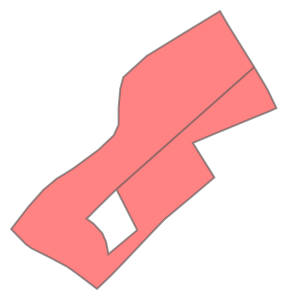

In [67]:
textoApoliRadios2(radios.WKT[problems[3]])


In [64]:
problems = []
for i in range(radios.shape[0]):
    try:
        textoApoliRadios(radios.WKT[i])
    except:
        problems.append(i)

Filas con problemas:

In [71]:
problems

[130,
 181,
 784,
 1067,
 1131,
 1375,
 1644,
 1714,
 1723,
 1854,
 2271,
 2279,
 2297,
 2405,
 2416,
 2471,
 2553,
 2638,
 2641,
 2706,
 2707,
 2712,
 2717,
 2724,
 2750,
 2770,
 2803,
 2822,
 2866,
 2946,
 2978,
 3019,
 3148,
 3301,
 3530,
 3620,
 3622,
 3627,
 3705,
 3796,
 4383,
 4401,
 5111,
 5197,
 5207,
 5270,
 5284,
 5285,
 6333,
 6990,
 6991,
 7025,
 7044,
 7052,
 7678,
 7720,
 7726,
 10950,
 11030,
 11037,
 11098,
 12560,
 12989,
 13811,
 13821,
 13829,
 13851,
 14019,
 14020,
 14034,
 14036,
 14038,
 14046,
 14049,
 14057,
 14187,
 14224,
 14225,
 14228,
 14246,
 14261,
 14287,
 14301,
 14304,
 14307,
 14346,
 14380,
 14450,
 14553,
 14584,
 14626,
 14666,
 15012,
 15141,
 15179,
 15184,
 15193,
 15208,
 15216,
 15232,
 15831,
 15922,
 15928,
 15940,
 16071,
 16101,
 16102,
 16103,
 16166,
 16176,
 16252,
 16448,
 16464,
 16489,
 16517,
 16518,
 17341,
 17362,
 17839,
 17840,
 17970,
 18110,
 18253,
 18256,
 18919,
 18921,
 18923,
 19422,
 19430,
 19453,
 19455,
 19549]